# Optimal control

In [1]:
from sympy import *
init_printing()

In [60]:
# state
theta1, omega1, theta2, omega2 = symbols('\\theta_1 \\omega_1 \\theta_2 \\omega_2', real=True)
theta = Matrix([theta1, theta2])
omega = Matrix([omega1, omega2])
s = Matrix([theta, omega])
s.T

[\theta₁  \theta₂  \omega₁  \omega₂]

In [61]:
# parameters
l1, l2, m1, m2, g = symbols('l_1 l_2 m_1 m_2 g', real=True, positive=True)

In [62]:
# state equations of motion
u = symbols('u', real=True)
a = m1*l1**2 + m2*l2**2
b = m2*l2**2
c = m2*l1*l2
d = g*m1*l1 + g*m2*l1
e = g*m2*l2

M = Matrix([
    [a + b + 2*c*cos(theta2), b + c*cos(theta2)],
    [b + c*cos(theta2), b]
])
C = Matrix([
    [-c*sin(theta2)*omega2, -c*sin(theta2)*(omega1 + omega2)],
    [c*sin(theta2)*omega2, 0]
])
G = Matrix([
    [-d*sin(theta1) - e*sin(theta1 + theta2)],
    [e*sin(theta1 + theta2)]
])
F = Matrix([omega, -M**-1*(C*omega + G)])
G = Matrix([Matrix([0,0]), M**-1*Matrix([0, 1])])
ds = simplify(F + G*u)
ds

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                    l₂⋅m₂⋅(l₁⋅cos(\theta₂) + l₂)⋅(\omega₁⋅\om
⎢                                    ─────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢-l₂⋅m₂⋅(l₁⋅cos(\theta₂) + l₂)⋅(\omega₁⋅\omega₂⋅l₁⋅l₂⋅m₂⋅sin(\theta₂) + \omega
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                   

In [63]:
# Lagrangian
alpha = symbols('\\alpha', real=True, nonnegative=True)
L = u**2
L

In [64]:
# costate variables
l = Matrix(symbols(['\\lambda_{' + str(var) + '}' for var in s]), real=True, nonzero=True)
l.T

[\lambda_{\theta_1}  \lambda_{\theta_2}  \lambda_{\omega_1}  \lambda_{\omega_2
}]

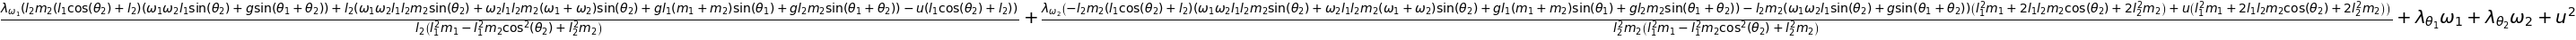

In [65]:
# Hamiltonian
H = l.dot(ds) + L
H

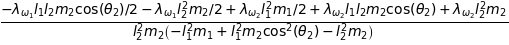

In [70]:
# optimal control
us = solve(H.diff(u), u)[0]
us

In [71]:
# costate equations of motion
dl = -H.diff(s)
dl

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                       2                                                     
⎢2⋅\lambda_{\omega_1}⋅l₁ ⋅m₂⋅(l₂⋅m₂⋅(l₁⋅cos(\theta₂) + l₂)⋅(\omega₁⋅\omega₂⋅l₁
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [75]:
simplify(Matrix([ds, dl]).subs(u, us))

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   